In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

In [2]:
from sklearn.datasets import load_iris
df=load_iris()

In [3]:
df.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [4]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
df.target[:5]

array([0, 0, 0, 0, 0])

In [6]:
df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
data=pd.DataFrame(df.data,columns=df.feature_names)

In [9]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
data['target']=df.target

In [11]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [12]:
targetnames={0:'setosa',1: 'versicolor',2:'virginica'}
data['target_names']=data['target'].map(targetnames)

In [13]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [14]:
data.groupby('target_names').size()

target_names
setosa        50
versicolor    50
virginica     50
dtype: int64

Text(0.5, 1.0, 'Iris data classwise')

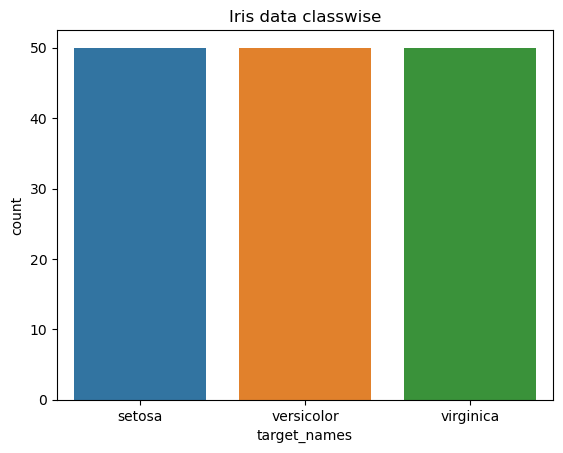

In [15]:
sns.countplot(data=data,x='target_names')
plt.title("Iris data classwise")


In [16]:
x=df.data
y=df.target

In [17]:
x[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [18]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
from sklearn.preprocessing import StandardScaler
x_scaled=StandardScaler().fit_transform(x)

In [20]:
x_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [22]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [23]:
y_pred =svc.predict(x_test)

In [24]:
print( classification_report(y_test,y_pred,target_names=df.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [25]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
pca_features=pca.fit_transform(x_scaled)
print("shape of pca",x_scaled.shape)

shape of pca (150, 4)


In [26]:
pca_features[:5]

array([[-2.26470281,  0.4800266 ,  0.12770602, -0.0241682 ],
       [-2.08096115, -0.67413356,  0.23460885, -0.10300677],
       [-2.36422905, -0.34190802, -0.04420148, -0.02837705],
       [-2.29938422, -0.59739451, -0.09129011,  0.06595556],
       [-2.38984217,  0.64683538, -0.0157382 ,  0.03592281]])

In [27]:
pca_features.shape

(150, 4)

In [28]:
pca_data=pd.DataFrame(data=pca_features,columns=["PCA1","PCA2","PCA3","PCA4"])
pca_data["target"]=y
pca_data['target_names']=pca_data['target'].map(targetnames)
pca_data.head()


,PCA1,PCA2,PCA3,PCA4,target,target_names
0,-2.264703,0.480027,0.127706,-0.024168,0,setosa
1,-2.080961,-0.674134,0.234609,-0.103007,0,setosa
2,-2.364229,-0.341908,-0.044201,-0.028377,0,setosa
3,-2.299384,-0.597395,-0.091290,0.065956,0,setosa
4,-2.389842,0.646835,-0.015738,0.035923,0,setosa


In [29]:
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [30]:
x_train,x_test,y_train,y_test = train_test_split(pca_data.drop(["PCA3","PCA4","target","target_names"],axis=1),
                                                 pca_data["target"],test_size=0.2,random_state=42)

In [31]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [32]:
y_pred =svc.predict(x_test)

In [33]:
print( classification_report(y_test,y_pred,target_names=df.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.88      0.78      0.82         9
   virginica       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [34]:
x_train,x_test,y_train,y_test = train_test_split(pca_data.drop(["PCA4","target","target_names"],axis=1),
                                                 pca_data["target"],test_size=0.2,random_state=42)

In [35]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [36]:
y_pred =svc.predict(x_test)

In [37]:
print( classification_report(y_test,y_pred,target_names=df.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

